In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [5]:
diamond = pd.read_csv('diamonds.csv')

In [6]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
diamond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
diamond.columns
diamond.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
def converter(cut):
    if cut == "Ideal":
        return int(1)
    elif cut == "Premium":
        return int(2)
    elif cut == "Very Good":
        return int(3)
    elif cut == "Good":
        return int (4)
    elif cut == "Fair":
        return int(5) 
diamond["cut"] = diamond["cut"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
def converter(color):
    if color == "D":
        return int(1)
    elif color == "E":
        return int(2)
    elif color == "F":
        return int(3)
    elif color == "G":
        return int (4)
    elif color == "H":
        return int(5) 
    elif color == "I":
        return int(6) 
    elif color == "J":
        return int(7) 
diamond["color"] = diamond["color"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
def converter(clarity):
    if clarity == "IF":
        return int(1)
    elif clarity == "VVS1":
        return int(2)
    elif clarity == "VVS2":
        return int(3)
    elif clarity == "VS1":
        return int (4)
    elif clarity == "VS2":
        return int(5)
    elif clarity == "SI1":
        return int(6)    
    elif clarity == "SI2":
        return int(7) 
    elif clarity == "I1":
        return int(8)   
diamond["clarity"] = diamond["clarity"].apply(converter)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75


In [13]:
#sns.pairplot(diamond)

In [14]:
#sns.distplot(diamond['price'])

In [15]:
#sns.heatmap(diamond.corr())


In [16]:
#sns.factorplot(data=diamond , kind='box' , size=7, aspect=2.5)

In [17]:
#sns.kdeplot(diamond['carat'], shade=True , color='b')

In [18]:
#sns.jointplot(x='carat' , y='price' , data=diamond , size=5)

In [19]:
#sns.factorplot(x='cut', data=diamond , kind='count',aspect=2.5 )

In [20]:
#sns.factorplot(x='cut', y='price', data=diamond, kind='box' ,aspect=2.5 )

In [21]:
#sns.factorplot(x='color', data=diamond , kind='count',aspect=2.5 )

In [22]:
#sns.factorplot(x='color', y='price' , data=diamond , kind='violin', aspect=2.5)

In [23]:
#sns.boxplot(x='clarity', y='price', data=diamond)

In [24]:
#plt.hist('depth' , data=diamond , bins=25)

In [25]:
#sns.jointplot(x='depth', y='price' , data=diamond , kind='regplot', size=5)

In [26]:
#sns.kdeplot(diamond['table'] ,shade=True , color='b')

In [27]:
X = diamond[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = diamond['price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression() 

In [32]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
carat,11227.702885
cut,-127.855942
color,-332.241548
clarity,-504.513134
depth,-61.276369
table,-16.585843
x,-1085.487717
y,110.774746
z,-103.055126


In [34]:
predictions = lr.predict(X_test)

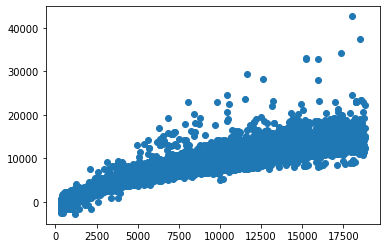

In [35]:
plt.scatter(y_test,predictions)

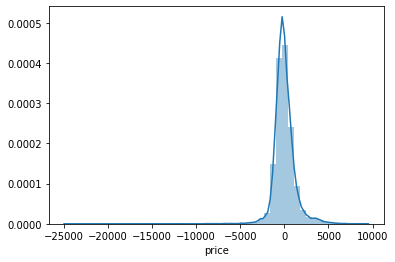

In [36]:
sns.distplot((y_test-predictions),bins=50);

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
#Prozentualer Anteil einmal ausrechnen!
#print('MSE:', metrics.mean_squared_error(y_test, predictions))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#Neuronales Netz auf Basis von linearer Regression

MAE: 806.2346055309512


In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [39]:
diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [40]:
#Nicht notwendig, da überall Werte vorhanden
#diamond = diamond.dropna()


In [41]:
train_dataset = diamond.sample(frac=0.8,random_state=0)
test_dataset = diamond.drop(train_dataset.index)

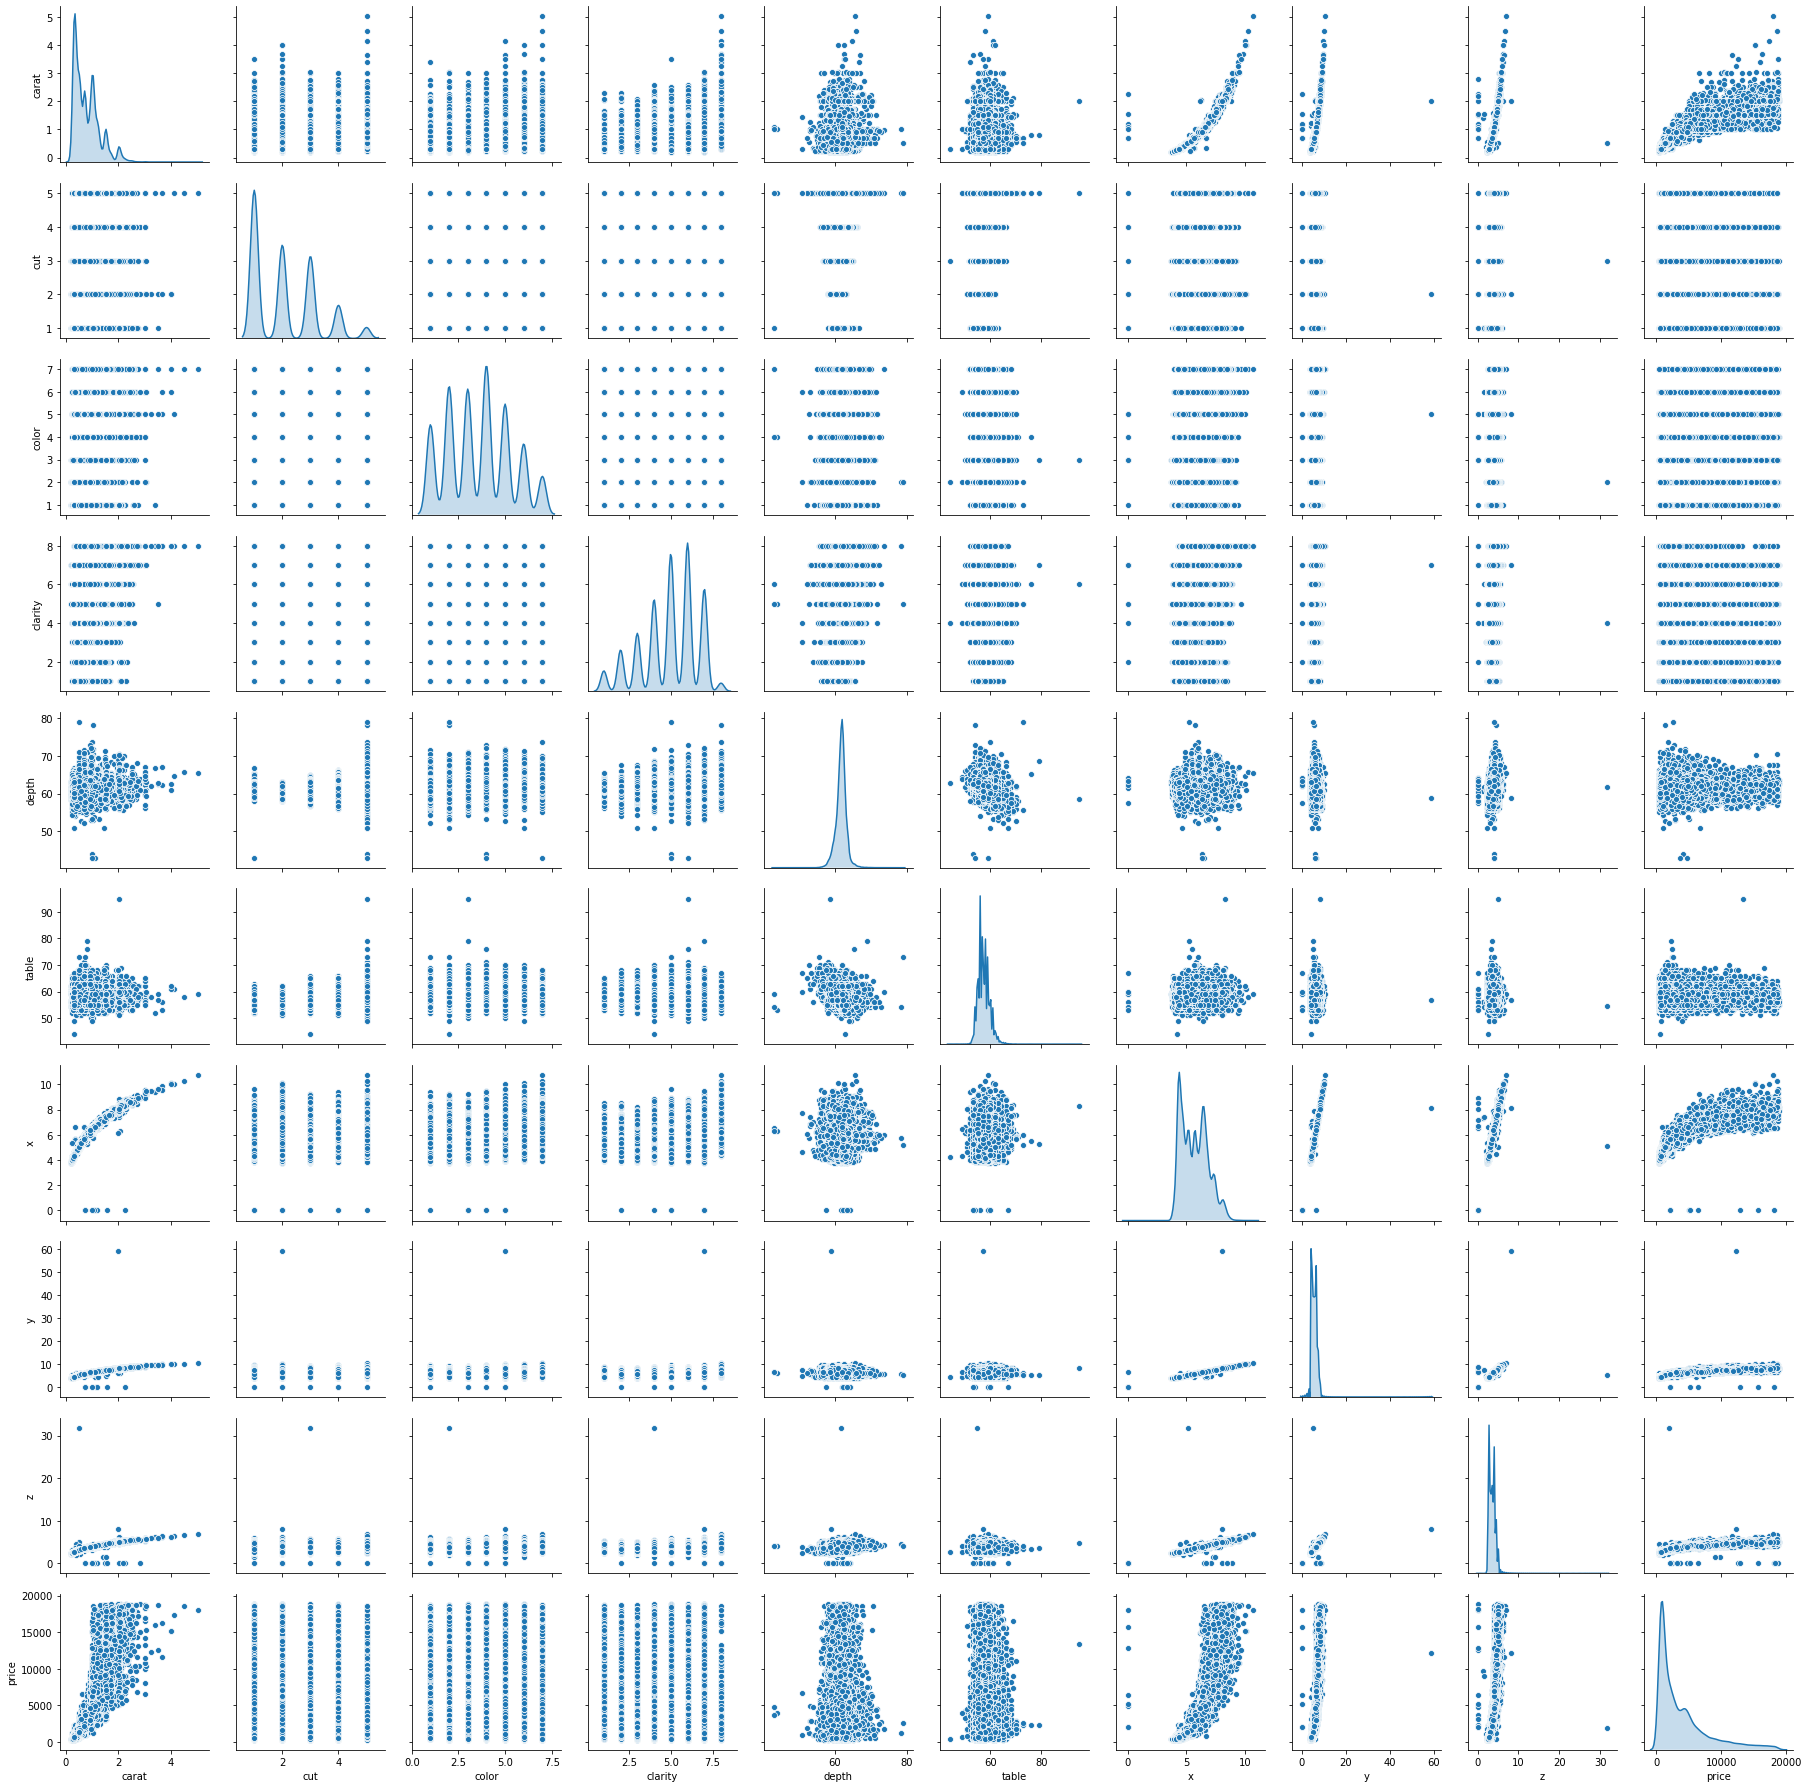

In [42]:
#Inspection of the data, 
sns.pairplot(train_dataset[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"]], diag_kind="kde")

In [43]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
carat,43152.0,0.797184,0.473724,0.2,0.40,0.70,1.04,5.01
cut,43152.0,2.092649,1.115636,1.0,1.00,2.00,3.00,5.00
color,43152.0,3.600459,1.706301,1.0,2.00,4.00,5.00,7.00
clarity,43152.0,4.940605,1.649229,1.0,4.00,5.00,6.00,8.00
depth,43152.0,61.747900,1.430988,43.0,61.00,61.80,62.50,79.00
table,43152.0,57.455726,2.233570,44.0,56.00,57.00,59.00,95.00
x,43152.0,5.728950,1.122392,0.0,4.71,5.69,6.54,10.74
y,43152.0,5.732241,1.142865,0.0,4.72,5.71,6.53,58.90
z,43152.0,3.537722,0.708590,0.0,2.91,3.52,4.03,31.80


In [44]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

In [45]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [46]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', # We optimize for minimizing the mean squared error (mse)
                optimizer=optimizer,
                metrics=['mae', 'mse']) # We evaluate with the mean absolute error (mae) and the mean squared error (mse)
  return model

In [47]:
model = build_model()

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [49]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.07754682],
       [ 0.20873977],
       [ 0.36699018],
       [-0.0366562 ],
       [ 0.06008361],
       [-0.063496  ],
       [-0.18085657],
       [ 0.05304404],
       [ 0.33106557],
       [-0.01650078]], dtype=float32)

In [50]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# EPOCHS = 1000
#EPOCHS = 300 
EPOCHS = 50 
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

In [51]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
295,304556.427467,292.409485,304556.43750,5.310999e+06,311.375916,5310999.0,295
296,304432.897356,292.247009,304432.87500,5.190326e+06,311.126282,5190322.5,296
297,303897.558261,292.345398,303897.65625,5.217843e+06,320.106506,5217843.0,297
298,304663.117333,291.812073,304663.00000,5.362295e+06,313.025208,5362294.0,298
299,305476.359915,292.322144,305476.40625,5.259770e+06,313.790131,5259770.5,299


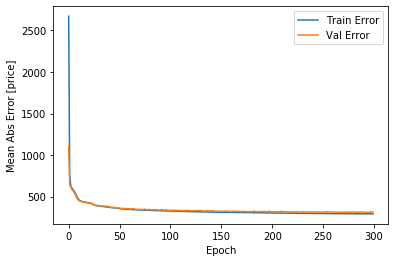

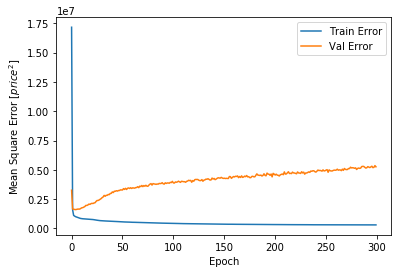

In [52]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


................

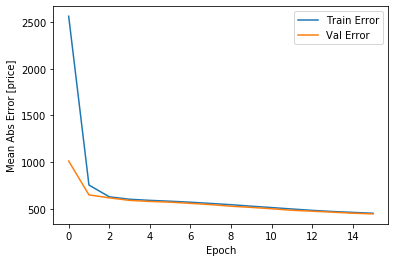

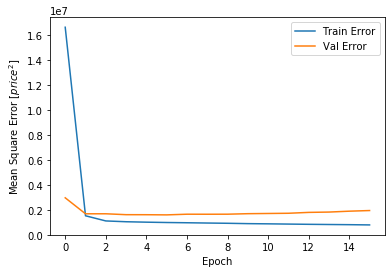

In [53]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [54]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} price".format(mae))


10788/10788 - 0s - loss: 972378.0588 - mae: 454.1251 - mse: 972378.1875
Testing set Mean Abs Error: 454.13 price


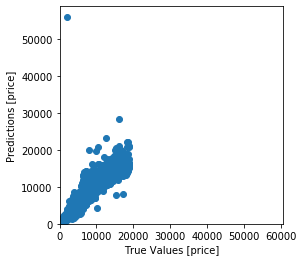

In [55]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


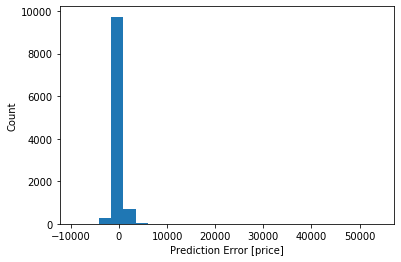

In [56]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [price]")
_ = plt.ylabel("Count")